In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv('mymoviedb.csv', lineterminator='\n')
movies.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
movies.shape

(9827, 9)

In [6]:
movies.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [7]:
movies.duplicated().sum()

0

In [8]:
movies.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


### Data Cleaning

##### Convert to Datetime

In [11]:
#convert column Release_Date to datetime data type
movies['Release_Date'] = pd.to_datetime(movies['Release_Date'])
print(movies['Release_Date'].dtypes)

datetime64[ns]


In [12]:
movies['Release_Date'] = movies['Release_Date'].dt.year

In [13]:
movies.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


##### Dropping Unnecessary Columns

In [15]:
#drop columns unnecessary for EDA
movies.drop(columns=['Poster_Url', 'Original_Language', 'Overview'], inplace=True)

In [16]:
movies.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [17]:
#no null values to drop
movies.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [18]:
movies.dropna(inplace=True)

In [19]:
movies.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

##### Fixing Genre Column

In [21]:
movies['Genre'] = movies['Genre'].str.split(", ")

In [23]:
movies.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"[Action, Adventure, Science Fiction]"
1,2022,The Batman,3827.658,1151,8.1,"[Crime, Mystery, Thriller]"
2,2022,No Exit,2618.087,122,6.3,[Thriller]
3,2021,Encanto,2402.201,5076,7.7,"[Animation, Comedy, Family, Fantasy]"
4,2021,The King's Man,1895.511,1793,7.0,"[Action, Adventure, Thriller, War]"


In [30]:
#EXPLODE method will explode the list of genres into different rows.
movies = movies.explode('Genre').reset_index(drop=True)

In [40]:
movies.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [43]:
#change Genre into category data type
movies['Genre'] = movies['Genre'].astype('category')
movies['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

### Exploratory Data Analysis
- Q1: What is the most frequent `genre` in the dataset?

In [47]:
movies['Genre'].value_counts()

Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1439
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64

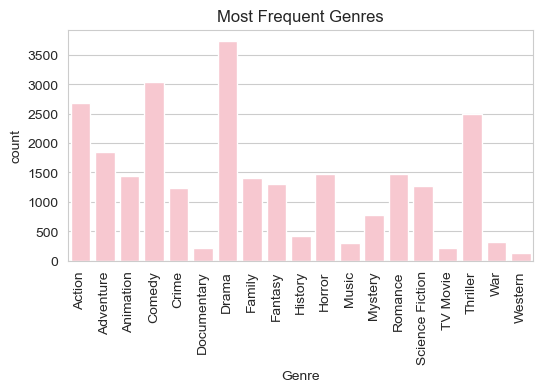

In [49]:
plt.figure(figsize=(6,3))
sns.set_style("whitegrid")
sns.countplot(x='Genre', data=movies, color='pink')
plt.title("Most Frequent Genres")
plt.xticks(rotation = 90)
plt.show()

- Q2: What movie got the highest `popularity`? what's its `genre`?

In [169]:
highest_popularity = movies.groupby('Title')['Popularity'].max()
highest_popularity.sort_values(ascending=False)

Title
Spider-Man: No Way Home                 5083.954
The Batman                              3827.658
No Exit                                 2618.087
Encanto                                 2402.201
The King's Man                          1895.511
                                          ...   
Badlands                                  13.357
Violent Delights                          13.356
The Offering                              13.355
The United States vs. Billie Holiday      13.354
Threads                                   13.354
Name: Popularity, Length: 9513, dtype: float64

In [175]:
movies[movies['Title'] == 'Spider-Man: No Way Home'][['Title', 'Genre']]

,Title,Genre
0,Spider-Man: No Way Home,Action
1,Spider-Man: No Way Home,Adventure
2,Spider-Man: No Way Home,Science Fiction


- Q3: Which year has the most filmmed movies?

  2021 has the highest amount of filmed movies.

In [181]:
movies.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [197]:
new_movies = movies.drop_duplicates(subset=['Release_Date', 'Title'], keep='first')
new_movies.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
3,2022,The Batman,3827.658,1151,8.1,Crime
6,2022,No Exit,2618.087,122,6.3,Thriller
7,2021,Encanto,2402.201,5076,7.7,Animation
11,2021,The King's Man,1895.511,1793,7.0,Action


In [207]:
most_filmed_year = new_movies.groupby('Release_Date')['Title'].count().sort_values(ascending=False)
most_filmed_year

Release_Date
2021    713
2018    529
2017    509
2019    499
2016    469
       ... 
1920      1
1930      1
1929      1
1925      1
2024      1
Name: Title, Length: 102, dtype: int64

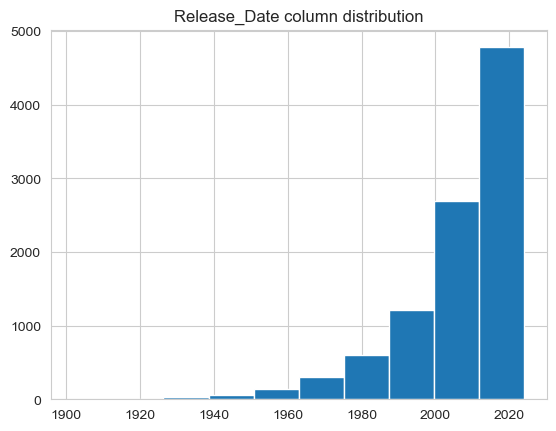

In [223]:
new_movies['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()